In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
print(tf.__version__)

2.7.0


# Operation on Tensors
* tf.constant()
* tf.variable()

In [3]:
# Create a constant tensor
x = tf.constant([2,3,4])
x

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 3, 4])>

In [5]:
# Create a variable
v = tf.Variable(2.0, dtype=tf.float32, name='my_variable')
v

<tf.Variable 'my_variable:0' shape=() dtype=float32, numpy=2.0>

In [6]:
# Assign value to variable
v.assign(45.2)
v

<tf.Variable 'my_variable:0' shape=() dtype=float32, numpy=45.2>

## Operations mathematical
* add
* subtract
* multiply
* divide

In [9]:
v.assign_add(4)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=49.2>

In [10]:
v.assign_sub(10)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=39.2>

In [12]:
tf.multiply(v,2)

<tf.Tensor: shape=(), dtype=float32, numpy=78.4>

In [13]:
tf.divide(v,2)

<tf.Tensor: shape=(), dtype=float32, numpy=19.6>

## Pointwise operations
* tf.add()
* tf.subtract()
* tf.multiply()
* tf.math.*
* tf.math.exp()

In [14]:
# Create constant tensor
c1 = tf.constant([1,2,3,4,5])
c2 = tf.constant([10,20,30,40,50])
c_multiply = tf.multiply(c1, c2)
c_multiply2 = c1 * c2
print("c1: ", c_multiply)
print("c2: ", c_multiply2)

c1:  tf.Tensor([ 10  40  90 160 250], shape=(5,), dtype=int32)
c2:  tf.Tensor([ 10  40  90 160 250], shape=(5,), dtype=int32)


In [15]:
# create constant variable
# define the data type first if the operations requires specific data type
a = tf.constant([1,2,3],dtype=tf.float32)
b = tf.math.exp(a)
print("b: ",b)

b:  tf.Tensor([ 2.7182817  7.389056  20.085537 ], shape=(3,), dtype=float32)


## Numpy Interoperability
TensorFlow can take native python types and Numpy arrays as operands

In [16]:
# native python list
list_a = [1,2]
list_b = [3,4]
array_a = np.array([1,2])
array_b = np.array([3,4])

In [17]:
tf.add(list_a,list_b)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6])>

In [18]:
tf.add(array_a,array_b)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6])>

### Convert a "native TF tensor" to a "numpy array"

In [19]:
tensor_a = tf.constant([1,2,3])
convert_np_array = tensor_a.numpy()
convert_np_array

array([1, 2, 3])

# Linear Regression

In [24]:
# Create constant tensor from tensor like object
x = tf.constant(range(10), dtype= tf.float32)
Y = x * 2 + 10
print("x:.{}".format(x))
print(":.{}".format(Y))

x:.[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
:.[10. 12. 14. 16. 18. 20. 22. 24. 26. 28.]


In [27]:
x_test = tf.constant(range(10,20), dtype=tf.float32)
Y_test = 2 * x_test + 10

print("x_test:.{}".format(x_test))
print("Y_test:.{}".format(Y_test))

x_test:.[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Y_test:.[30. 32. 34. 36. 38. 40. 42. 44. 46. 48.]


## Lost function
return the sample mean of the training set

In [28]:
# The .numpy() method convert tensorflow tensors to np array
y_mean = Y.numpy().mean()

# Crete predict mean function
def predict_mean(X):
    y_hat = [y_mean] * len(x)
    return y_hat

Y_hat = predict_mean(x_test)    
Y_hat

[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0]

In [30]:
# Loss function
errors = (Y_hat - Y) ** 2
loss = tf.reduce_mean(errors)
loss.numpy()

33.0

# Gradient Function
* tf.GradientTape instance which will record gradient information


In [34]:
def compute_gradients(X, Y, w0, w1):
    with tf.GradientTape() as tape:
        loss = loss_mse(X, Y, w0, w1)
    return tape.gradient(loss, [w0, w1])

In [35]:
w0 = tf.Variable(0.0)
w1 = tf.Variable(0.0)

dw0, dw1 = compute_gradients(x, Y, w0, w1)

In [36]:
print("dw0:", dw0.numpy())
print("dw1:", dw1.numpy())

dw0: -204.0
dw1: -38.0


# Training Loop

In [37]:
STEPS = 1000
LEARNING_RATE = 0.02
MSG = "Step {step} - loss: {loss}, w0: {w0}, w1: {w1} \n"

w0 = tf.Variable(0.0)
w1 = tf.Variable(0.0)

for step in range(0, STEPS + 1):
     dw0, dw1 = compute_gradients(x, Y, w0, w1)
     w0.assign_sub(dw0 * LEARNING_RATE)
     w1.assign_sub(dw1 * LEARNING_RATE)
     
     if step % 100 == 0:
          loss = loss_mse(x, Y, w0, w1)
          print(MSG.format(step = step, loss  = loss, w0 = w0.numpy(), w1 = w1.numpy()))

Step 0 - loss: 35.70719528198242, w0: 4.079999923706055, w1: 0.7599999904632568 

Step 100 - loss: 2.6017532348632812, w0: 2.4780430793762207, w1: 7.002389907836914 

Step 200 - loss: 0.26831889152526855, w0: 2.153517961502075, w1: 9.037351608276367 

Step 300 - loss: 0.027671903371810913, w0: 2.0493006706237793, w1: 9.690855979919434 

Step 400 - loss: 0.0028539239428937435, w0: 2.0158326625823975, w1: 9.90071964263916 

Step 500 - loss: 0.0002943490108009428, w0: 2.005084753036499, w1: 9.96811580657959 

Step 600 - loss: 3.0356444767676294e-05, w0: 2.0016329288482666, w1: 9.989760398864746 

Step 700 - loss: 3.1322738323069643e-06, w0: 2.0005245208740234, w1: 9.996710777282715 

Step 800 - loss: 3.2238213520940917e-07, w0: 2.0001683235168457, w1: 9.998944282531738 

Step 900 - loss: 3.369950718479231e-08, w0: 2.000054359436035, w1: 9.999658584594727 

Step 1000 - loss: 3.6101481803996194e-09, w0: 2.0000178813934326, w1: 9.99988842010498 



In [39]:
# Here we can compare the test loss for this linear regression to the test loss from the baseline model.
# Its output will always be the mean of the training set:
loss = loss_mse(x_test, Y_test, w0, w1)
loss.numpy()

2.4563633e-08

# Train non-linear models

In [40]:
x = tf.constant(np.linspace(0, 2, 1000), dtype=tf.float32)
Y = x * tf.exp(-x**2)

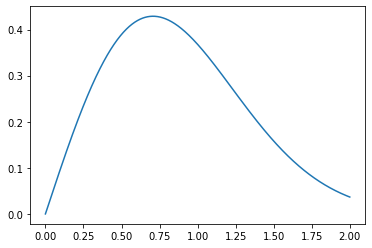

In [41]:
%matplotlib inline
plt.plot(x,Y)

In [55]:
def make_features(x):
    # tf.ones_like() methods will create a tensor of all ones that has the same shape as input
    f1 = tf.ones_like(x)
    f2 = x
    
    # tf.square() method will compute of input tensor element wise
    f3 = tf.square(x)
    
    # tf.sqrt() method will compute element wise square root of the input tensor
    f4 = tf.sqrt(x)
    
    # tf.exp(x) method will compute exponential of input tensor element wise
    f5 = tf.exp(x)
    
    # tf.stack() method will stacks a list of rank-R tensors into one rank-(R+1) tensor
    return tf.stack([f1, f2, f3, f4, f5], axis =1)



In [43]:
# predict procedure
def predict(x, W):
    return tf.squeeze(x @ W, -1)

In [46]:
def loss_mse(x, Y, W):
    Y_hat = predict(x,W)
    errors = (Y_hat - Y) ** 2
    return tf.reduce_mean(errors)

In [65]:
# Let's define compute_gradients() procedure for computing the loss gradients.
def compute_gradients(X, Y, W):
    with tf.GradientTape() as tape:
        loss = loss_mse(Xf, Y, W)
    return tape.gradient(loss, W)

STEP: 2000 MSE: 0.0023767943494021893


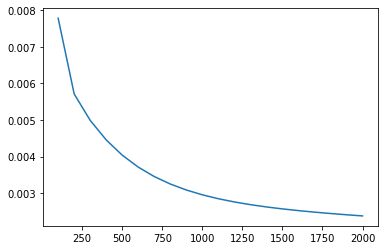

In [66]:
STEPS = 2000
LEARNING_RATE = .02


Xf = make_features(x)
n_weights = Xf.shape[1]

W = tf.Variable(np.zeros((n_weights, 1)), dtype=tf.float32)

# For plotting
steps, losses = [], []
plt.figure()


for step in range(1, STEPS + 1):

    dW = compute_gradients(x, Y, W)
    W.assign_sub(dW * LEARNING_RATE)

    if step % 100 == 0:
        loss = loss_mse(Xf, Y, W)
        steps.append(step)
        losses.append(loss)
        plt.clf()
        plt.plot(steps, losses)


print("STEP: {} MSE: {}".format(STEPS, loss_mse(Xf, Y, W)))